# Bài tập tự thực hành 2: Kmeans

In [61]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data_dir = "./cats_and_dogs_filtered"

In [62]:
# load và resize  ảnh
def load_and_preprocess_images(image_paths, target_size=(100, 100)):
    images = []
    for path in image_paths:
        image = imread(path)
        image = resize(image, target_size)
        images.append(image.flatten())  # Biến ảnh thành một vectơ 1D
    return np.array(images)

In [63]:
# Load và chuẩn hóa ảnh mèo
cat_path = os.path.join(data_dir, "train", "cats")
cat_image_paths = [os.path.join(cat_path, f) for f in os.listdir(cat_path) if f.endswith('.jpg')]
cat_images = load_and_preprocess_images(cat_image_paths)

In [64]:
# Load và chuẩn hóa ảnh chó
dog_path = os.path.join(data_dir, "train", "dogs")
dog_image_paths = [os.path.join(dog_path, f) for f in os.listdir(dog_path) if f.endswith('.jpg')]
dog_images = load_and_preprocess_images(dog_image_paths)


In [65]:
# Kết hợp các vectơ đặc trưng của chó và mèo thành một tập dữ liệu
X = np.concatenate([dog_images, cat_images])

In [59]:
# Áp dụng KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [60]:
# Giả sử nhãn 0 là cho chó và nhãn 1 là cho mèo
labels = kmeans.labels_
predicted_labels = np.where(labels == 0, 1, 0)  # Đảo ngược nhãn để phù hợp với nhãn thực tế

# Tính độ chính xác
true_labels = np.concatenate([np.zeros(len(dog_images)), np.ones(len(cat_images))])
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5185


# Bài tập tự thực hành 1: EM

In [18]:
import numpy as np
from numpy import random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import multivariate_normal
from sklearn import datasets
import matplotlib.pyplot as plt


iris = datasets.load_iris()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
X=iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
X.shape

(150, 4)

In [22]:
type(X)

numpy.ndarray

In [15]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.datasets import load_iris

class GMM():
    def __init__(self, k, dim, init_mu=None, init_sigma=None, init_pi=None, colors=None):
        self.k = k
        self.dim = dim
        if init_mu is None:
            init_mu = np.random.rand(k, dim) * 20 - 10
        self.mu = init_mu
        if init_sigma is None:
            init_sigma = np.zeros((k, dim, dim))
            for i in range(k):
                init_sigma[i] = np.eye(dim)
        self.sigma = init_sigma
        if init_pi is None:
            init_pi = np.ones(self.k) / self.k
        self.pi = init_pi
        if colors is None:
            colors = np.random.rand(k, 3)
            for i in range(k):
                colors[i, 2] = i / k
        self.colors = colors
    
    def init_em(self, X):
        self.data = X
        self.num_points = X.shape[0]
        self.z = np.zeros((self.num_points, self.k))
    
    def e_step(self):
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mu[i], cov=self.sigma[i])
        self.z /= self.z.sum(axis=1, keepdims=True)
    
    def m_step(self, reg=1e-6):
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.num_points
        self.mu = np.matmul(self.z.T, self.data) / sum_z[:, None]
        for i in range(self.k):
            j = np.expand_dims(self.data, axis=1) - self.mu[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i])
            self.sigma[i] /= sum_z[i]
            # Add regularization to covariance matrices
            self.sigma[i] += np.eye(self.dim) * reg
    
    def log_likelihood(self, X):
        # ll = np.sum(np.log(np.sum(self.z * self.pi, axis=1)))
        
        ll = []
        for d in X:
            tot = 0
            for i in range(self.k):
                tot += self.pi[i] * multivariate_normal.pdf(d, mean=self.mu[i], cov=self.sigma[i])
            ll.append(np.log(tot))
        return np.sum(ll)
    
    
    def plot_gaussian(self, mean, cov, ax, n_std=2.0, facecolor='none', **kwargs):
        pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
            width=ell_radius_x * 2,
            height=ell_radius_y * 2,
            facecolor=facecolor,
            **kwargs)
        scale_x = np.sqrt(cov[0, 0]) * n_std
        mean_x = mean[0]
        scale_y = np.sqrt(cov[1, 1]) * n_std
        mean_y = mean[1]
        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mean_x, mean_y)
        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    def draw(self, ax, n_std=2.0, facecolor='none', **kwargs):
        if self.dim != 2:
            print("Drawing available only for 2D case.")
            return
        
        for i in range(self.k):
            self.plot_gaussian(self.mu[i], self.sigma[i], ax, n_std=n_std, edgecolor=self.colors[i], **kwargs)
            
            ax.scatter(self.mu[i, 0], self.mu[i, 1], c=self.colors[i], marker='x', label=f'Cluster {i+1} center')
        
        ax.legend()


Drawing available only for 2D case.


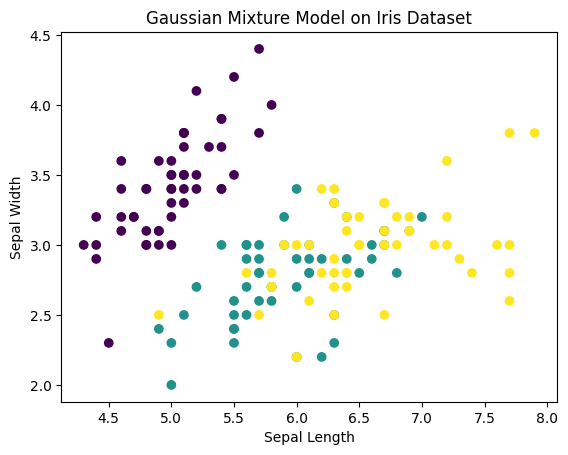

In [50]:
# Create a Gaussian Mixture Model with data 4D and 3 cluster
gmm = GMM(k=3, dim=4)
gmm.init_em(X)

for _ in range(100):
    gmm.e_step()
    gmm.m_step(reg=1e-6)

# Plot Gaussians
fig, ax = plt.subplots()
gmm.draw(ax)
plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Gaussian Mixture Model on Iris Dataset')

    
plt.show()